<a href="https://colab.research.google.com/github/HAMAD-Ba/Sentiment/blob/Islam-Q%26A/Q%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Important libraries

In [128]:
pip install python-bidi arabic_reshaper

ERROR: Operation cancelled by user


In [129]:
!pip install python-bidi

ERROR: Operation cancelled by user


In [130]:
from bidi.algorithm import get_display
import arabic_reshaper


In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Read , Merge, Remove Duplicates

In [133]:
df1 = pd.read_excel('/content/IslamQA_with_FatwaRef_12_11_2023 (2).xlsx')
df2 = pd.read_excel('/content/IslamQA_with_FatwaRef_30_06_2024 (1).xlsx')

In [135]:
df1 = df1.drop(['date','answerContents','views'], axis=1)
df2 = df2.drop(['date','answerContents','views'], axis=1)

In [138]:
# Merge the Dataframes
merged_df = pd.concat([df1, df2], ignore_index=True)
# Remove duplicates
merged_df = merged_df.drop_duplicates()
# Save the new dataframe
merged_df.to_excel('merged_file.xlsx', index=False,)

Exception ignored in: <function ZipFile.__del__ at 0x7dbeb6c9c820>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1821, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


# Calculate the average word number of **question - questionSummary - answer - answerSummary**

In [140]:
# Define a function to calculate word count
def calculate_word_count(text):
    if isinstance(text, float):
        return 0
    words = str(text).split()
    return len(words)

# Calculate the average word count for each column
columns_to_calculate = ['question', 'answer', 'questionSummary', 'answerSummary']

for column in columns_to_calculate:
    merged_df[column + '_word_count'] = merged_df[column].apply(calculate_word_count)

# Calculate the average word count for each column
average_word_counts = []
for column in columns_to_calculate:
    average_word_count = merged_df[column + '_word_count'].mean()
    average_word_counts.append((column, average_word_count))

# Display the average word counts
for column, average_count in average_word_counts:
    print(f"Average word count for {column}: {average_count.round(2)}")

Average word count for question: 69.76
Average word count for answer: 498.9
Average word count for questionSummary: 9.32
Average word count for answerSummary: 2.91


In [141]:
# Create a new dataframe
average_word_counts_df = pd.DataFrame(average_word_counts, columns=['Column Name', 'Average Word Count'])

# Save the dataframe to an Excel file
average_word_counts_df.to_excel('average_word_counts.xlsx', index=False)


# Number of questions for each number of topics

In [143]:
# Calculate the number of questions for each number of topics
topic_counts = merged_df['mainTopic'].str.count(',') + 1
questions_by_topic_count = topic_counts.value_counts().sort_index()

# Display the count of questions for each number of topics
print("Number of Questions by Topic Count:")
print("----------------------------------")
for num_topics, count in questions_by_topic_count.items():
    if num_topics == 1:
        print(f"{num_topics} topic only = {count} Q")
    else:
        print(f"{num_topics} topics = {count} Q")
print("----------------------------------")
print("Total number of Questions are = ", merged_df['question'].count())

Number of Questions by Topic Count:
----------------------------------
1 topic only = 26585 Q
2 topics = 3536 Q
3 topics = 238 Q
4 topics = 7 Q
5 topics = 1 Q
----------------------------------
Total number of Questions are =  30367


# Histogram


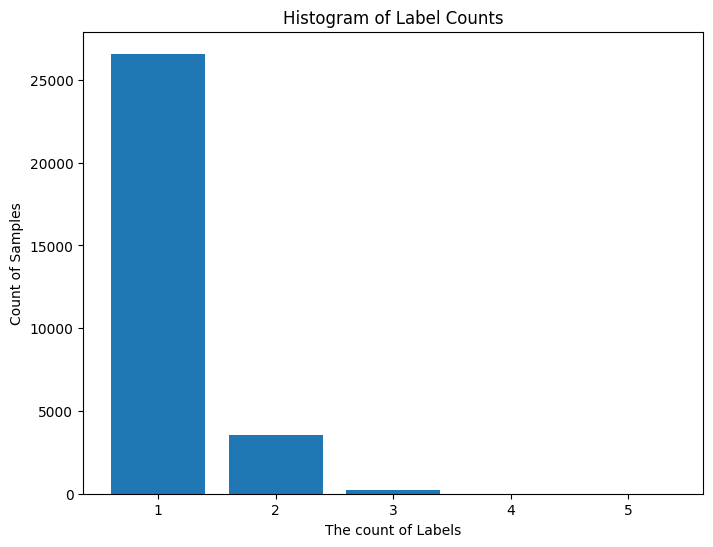

In [127]:


# Calculate the number of samples for each label count
label_counts = merged_df['mainTopic'].str.count(',') + 1
label_count_counts = label_counts.value_counts().sort_index()

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the size as desired
plt.title("Histogram of Label Counts")
plt.xlabel("The count of Labels")
plt.ylabel("Count of Samples")
plt.bar(label_count_counts.index, label_count_counts.values)
plt.show()


# Pie Chart

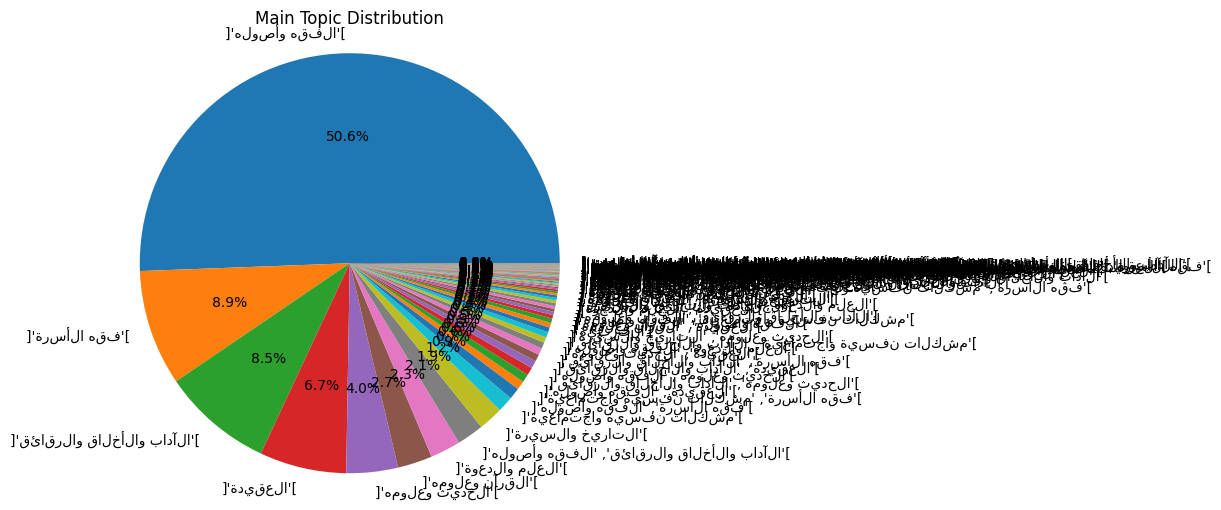

In [111]:
# Calculate the percentage of each mainTopic
mainTopic_percentages = (merged_df['mainTopic'].value_counts(normalize=True) * 100)

# Create a pie chart for all mainTopics
plt.figure(figsize=(8, 6))  # Adjust the size as desired
plt.title("Main Topic Distribution")

# Reverse the Arabic text labels
labels = [mainTopic[::-1] for mainTopic in mainTopic_percentages.index]

plt.pie(mainTopic_percentages, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

([<matplotlib.patches.Wedge at 0x7dbe61875510>,
 [Text(-0.028320612158834933, 1.0996353681684439, "'ﻪﻟﻮﺻﺃﻭ ﻪﻘﻔﻟﺍ'"),
  Text(-1.0080073048500462, -0.44036493203812926, "'ﺓﺮﺳﻷﺍ ﻪﻘﻓ'"),
  Text(-0.4807064624640394, -0.9894045163356134, "'ﻖﺋﺎﻗﺮﻟﺍﻭ ﻕﻼﺧﻷﺍﻭ ﺏﺍﺩﻵﺍ'"),
  Text(0.21278775723881252, -1.0792225768437558, "'ﺓﺪﻴﻘﻌﻟﺍ'"),
  Text(0.6891068557711624, -0.8573982396349916, "'ﻪﻣﻮﻠﻋﻭ ﺚﻳﺪﺤﻟﺍ'"),
  Text(0.9030208741380354, -0.6281347792241554, "'ﺓﻮﻋﺪﻟﺍﻭ ﻢﻠﻌﻟﺍ'"),
  Text(1.004686045663739, -0.44789055543576656, "'ﻪﻣﻮﻠﻋﻭ ﻥﺁﺮﻘﻟﺍ'"),
  Text(1.0630833175450414, -0.28258425284758704, "'ﺓﺮﻴﺴﻟﺍﻭ ﺦﻳﺭﺎﺘﻟﺍ'"),
  Text(1.0915889105328394, -0.13577058003017092, "'ﺔﻴﻋﺎﻤﺘﺟﺍﻭ ﺔﻴﺴﻔﻧ ﺕﻼﻜﺸﻣ'"),
  Text(1.0989138459305468, -0.04887084224908406, "'ﺔﻴﺑﺮﺘﻟﺍ'"),
  Text(1.0998045451041505, -0.02073553877411177, ''),
  Text(1.099980177485418, -0.006603721613494213, "'ﺔﻴﻋﺮﺸﻟﺍ ﺔﺳﺎﻴﺴﻟﺍ'")],
 [Text(-0.01544760663209178, 0.5998011099100602, '50.8%'),
  Text(-0.5498221662818433, -0.24019905383897958, '11.5%'),
  Text(-0.2622035

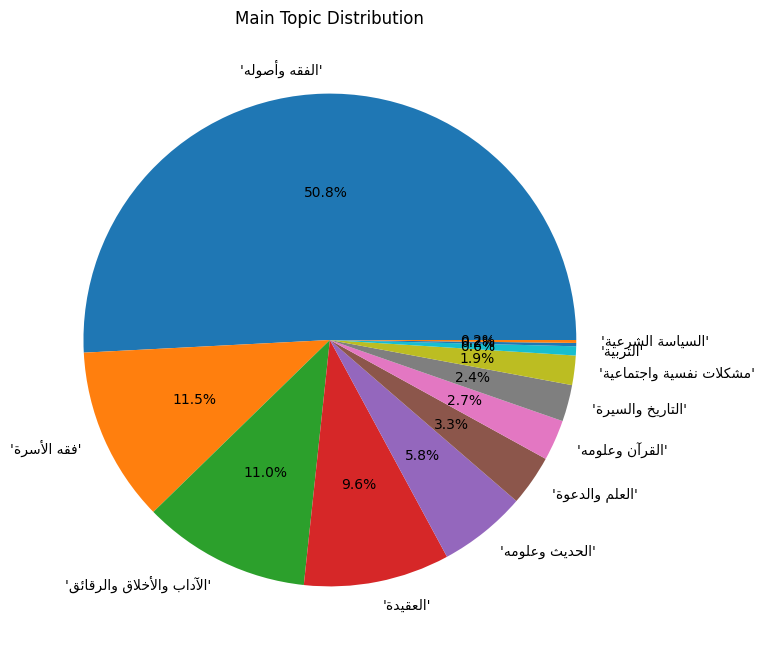

In [89]:
# Reverse the Arabic text labels
reshaped_labels = [get_display(arabic_reshaper.reshape(mainTopic[::1])) for mainTopic in mainTopic_percentages.index]
plt.figure(figsize=(14, 8))  # Adjust the size as desired
plt.title("Main Topic Distribution")

plt.pie(mainTopic_percentages, labels=reshaped_labels, autopct='%1.1f%%')

# Numer of questions for each topic

In [88]:
mainTopic_counts = merged_df['mainTopic'].value_counts()

# Display the number of questions in each mainTopic
for mainTopic, count in mainTopic_counts.items():
    print(f"MainTopic: {mainTopic}\t\tNumber of Questions: {count}")

MainTopic: ['الفقه وأصوله']		Number of Questions: 15364
MainTopic: ['فقه الأسرة']		Number of Questions: 2706
MainTopic: ['الآداب والأخلاق والرقائق']		Number of Questions: 2592
MainTopic: ['العقيدة']		Number of Questions: 2031
MainTopic: ['الحديث وعلومه']		Number of Questions: 1205
MainTopic: ['القرآن وعلومه']		Number of Questions: 811
MainTopic: ['العلم والدعوة']		Number of Questions: 709
MainTopic: ['الآداب والأخلاق والرقائق', 'الفقه وأصوله']		Number of Questions: 629
MainTopic: ['التاريخ والسيرة']		Number of Questions: 579
MainTopic: ['مشكلات نفسية واجتماعية']		Number of Questions: 369
MainTopic: ['فقه الأسرة', 'الفقه وأصوله']		Number of Questions: 271
MainTopic: ['فقه الأسرة', 'مشكلات نفسية واجتماعية']		Number of Questions: 202
MainTopic: ['العقيدة', 'الفقه وأصوله']		Number of Questions: 192
MainTopic: ['الحديث وعلومه', 'الآداب والأخلاق والرقائق']		Number of Questions: 183
MainTopic: ['الحديث وعلومه', 'الفقه وأصوله']		Number of Questions: 181
MainTopic: ['العقيدة', 'الآداب والأخلاق 

# Q&A > 350 word filter

In [109]:
# Filter the questions with more than 350 word
filtered_df = merged_df[merged_df['question_word_count'] > 350]
filtered_questions = filtered_df['question'].tolist()

# Export the filtered questions to an Excel file
with pd.ExcelWriter('Q>350.xlsx') as writer:
    pd.DataFrame(filtered_questions, columns=['Question']).to_excel(writer, sheet_name='Sheet1', index=False)


In [110]:
# Filter the answers with more than 350 word
filtered_df = merged_df[merged_df['answer_word_count'] > 350]
filtered_questions = filtered_df['answer'].tolist()

# Export the filtered answers to an Excel file
with pd.ExcelWriter('A>350.xlsx') as writer:
    pd.DataFrame(filtered_questions, columns=['Answers']).to_excel(writer, sheet_name='Sheet1', index=False)
